Use historical_data file

Using symbol.date_txn and close_price, you have to predict- predicted_price

Then we measure accuracy using following:

For each symbol calculate:
X = Median of  (predicted_price-close_price)/close_price

Final_accuracy = Average of X

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing data
his_data=pd.read_excel(r"C:\Users\sreeman\Desktop\my proj\historical_data.xlsx")

finding nulls

In [3]:
his_data.isnull().sum()

symbol               0
date_txn             0
close_price          0
predicted_price    777
dtype: int64

Removing nulls 

In [4]:
his_data.dropna(subset=['predicted_price'],how='any',inplace=True)

In [5]:
his_data.isnull().sum()

symbol             0
date_txn           0
close_price        0
predicted_price    0
dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics 

In [29]:
x = his_data.drop(['predicted_price','symbol'],axis = 1,inplace = False)

# x1 = his_data.drop(['predicted_price','close_price'],axis = 1,inplace = False)

x1 = his_data['date_txn']

x2 = his_data['close_price']

y = his_data['predicted_price']


In [8]:
his_data

,symbol,date_txn,close_price,predicted_price
0,AAL,2014-12-02,47.55,47.93
1,AAL,2014-12-03,47.93,49.33
2,AAL,2014-12-04,49.33,50.68
3,AAL,2014-12-05,50.68,50.50
4,AAL,2014-12-08,50.50,48.00
...,...,...,...,...
1048570,KMF,2015-08-12,22.76,21.94
1048571,KMF,2015-08-13,21.94,22.51
1048572,KMF,2015-08-14,22.51,22.30
1048573,KMF,2015-08-17,22.30,22.10


In [41]:
x

,date_txn,close_price
0,735569,47.55
1,735570,47.93
2,735571,49.33
3,735572,50.68
4,735575,50.50
...,...,...
1048570,735822,22.76
1048571,735823,21.94
1048572,735824,22.51
1048573,735827,22.30


In [39]:
# dat time linking
import datetime as dt
x['date_txn'] = pd.to_datetime(x['date_txn'])
x['date_txn']=x['date_txn'].map(dt.datetime.toordinal)

In [30]:
x1 = pd.to_datetime(x1)
x1=x1.map(dt.datetime.toordinal)

In [11]:
x

,date_txn,close_price
0,735569,47.55
1,735570,47.93
2,735571,49.33
3,735572,50.68
4,735575,50.50
...,...,...
1048570,735822,22.76
1048571,735823,21.94
1048572,735824,22.51
1048573,735827,22.30


In [31]:
x1


0          735569
1          735570
2          735571
3          735572
4          735575
            ...  
1048570    735822
1048571    735823
1048572    735824
1048573    735827
1048574    735828
Name: date_txn, Length: 1047798, dtype: int64

In [12]:
# import datetime as dt
# x1 = pd.to_datetime(x1)
# x1=x1.map(dt.datetime.toordinal)

In [13]:
# x1

In [14]:
#x2

In [84]:
#creating the object for model
reg = linear_model.LinearRegression()

In [178]:
# fitting the data
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
# getting predictions
y_pred=reg.predict(x)

In [180]:
y_pred

array([47.57069831, 47.95067913, 49.35062858, ..., 22.52956012,
       22.31954413, 22.1195428 ])

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [113]:
y.shape

(1047798,)

In [114]:
x.shape

(1047798, 2)

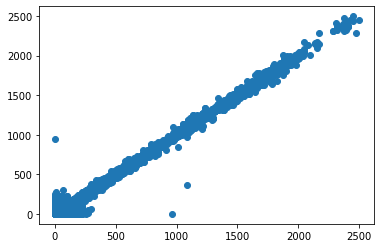

In [232]:
plt.scatter(x2, y)


In [125]:
y_pred.shape

(209560,)

In [126]:
x_test.shape

(209560, 2)

In [127]:
y_test.shape

(209560,)

In [128]:
y_pred.shape

(209560,)

In [119]:
y_pred

array([ 34.00370467,  38.83493724,  16.22844366, ...,  52.4762052 ,
        11.56072397, 172.86159269])

In [185]:
reg.intercept_

5.527570915533232

In [122]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
rmse

12.358905757034128

In [ ]:
r2

In [38]:
import matplotlib.pyplot as plt

In [ ]:
y_train

In [136]:
mean_squared_error(y_test,y_pred)

12.358905757034128

In [137]:
r2_score(y_test, y_pred)

0.9986209992644028

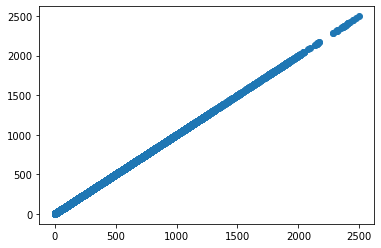

In [229]:
plt.scatter(x2, y_pred)


In [139]:
x2_train.shape

(838238,)

In [140]:
x2_test.shape

(209560,)

In [143]:
y_test.shape

(209560,)

In [144]:
y_pred.shape

(209560,)

In [151]:
reg.score(x,y)

0.9985575871829528

In [154]:
m = 0
c = 0

L = 0.000003  # The learning Rate
iter = 10000  # The number of iterations to perform gradient descent

n = float(len(x2)) # Number of elements in X

# Performing Gradient Descent 
for i in range(iter): 
    Y_pred = m*x2_test + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x2_test * (y_test - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(x2_test - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-0.11520234730624752 -0.00017478640359122407


In [220]:
yy=m*x+c

In [157]:
m

-0.11520234730624752

In [158]:
c

-0.00017478640359122407

In [172]:
x.shape

(1047798, 2)

In [173]:
y.shape

(1047798,)

In [175]:
y_pred.shape

(209560,)

In [186]:
X = x
Y = y

predicted_values = pd.concat([X,Y],axis=1)


In [187]:
predicted_values.insert(3, column = "predicted_values" ,value = y_pred)


In [188]:
predicted_values

,date_txn,close_price,predicted_price,predicted_values
0,735569,47.55,47.93,47.570698
1,735570,47.93,49.33,47.950679
2,735571,49.33,50.68,49.350629
3,735572,50.68,50.50,50.700580
4,735575,50.50,48.00,50.520563
...,...,...,...,...
1048570,735822,22.76,21.94,22.779567
1048571,735823,21.94,22.51,21.959585
1048572,735824,22.51,22.30,22.529560
1048573,735827,22.30,22.10,22.319544


In [206]:
predicted_values['median'] = (predicted_values['predicted_values']-predicted_values['close_price'])

In [212]:
predicted_values

,date_txn,close_price,predicted_price,predicted_values,median
0,735569,47.55,47.93,47.570698,0.000271
1,735570,47.93,49.33,47.950679,0.000269
2,735571,49.33,50.68,49.350629,0.000262
3,735572,50.68,50.50,50.700580,0.000255
4,735575,50.50,48.00,50.520563,0.000256
...,...,...,...,...,...
1048570,735822,22.76,21.94,22.779567,0.000567
1048571,735823,21.94,22.51,21.959585,0.000588
1048572,735824,22.51,22.30,22.529560,0.000573
1048573,735827,22.30,22.10,22.319544,0.000579


In [213]:
pred_values = predicted_values['median']

In [216]:
pred_values

0          0.000271
1          0.000269
2          0.000262
3          0.000255
4          0.000256
             ...   
1048570    0.000567
1048571    0.000588
1048572    0.000573
1048573    0.000579
1048574    0.000584
Name: median, Length: 1047798, dtype: float64

In [214]:
median = pred_values.median() 


In [208]:
median

0.012907068139316635

In [209]:
predicted_values['median']

0          0.020698
1          0.020679
2          0.020629
3          0.020580
4          0.020563
             ...   
1048570    0.019567
1048571    0.019585
1048572    0.019560
1048573    0.019544
1048574    0.019543
Name: median, Length: 1047798, dtype: float64

In [210]:
predicted_values['median'] = median/predicted_values['close_price']

In [211]:
predicted_values['median']

0          0.000271
1          0.000269
2          0.000262
3          0.000255
4          0.000256
             ...   
1048570    0.000567
1048571    0.000588
1048572    0.000573
1048573    0.000579
1048574    0.000584
Name: median, Length: 1047798, dtype: float64

In [217]:
predicted_values['median'].mean()

0.000833561486029435

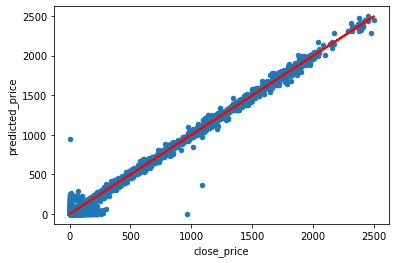

In [234]:
# visualizing the result
predicted_values.plot(kind = 'scatter', x='close_price',y = 'predicted_price')
# plotting the regression line
plt.plot(x2,y_pred,color  = 'red',linewidth = 2)
plt.show()
